<a href="https://colab.research.google.com/github/Bonacelli/pycourses/blob/master/PyFinance/02_Plotting_IBOV_vs_DOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=b7796a26b9a306a7c19a03e6f8d297cf204b36ac889595649ed0e2b5402ca132
  Stored in directory: /tmp/pip-ephem-wheel-cache-wgxty2dg/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [16]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pandas_datareader.data as web
import seaborn as sns

# Obtaining and cleansing data

In [8]:
tickers = ['^BVSP', "USDBRL=X"]
carteira = web.get_data_yahoo(tickers, start="2007-01-01")["Close"]

[*********************100%***********************]  2 of 2 completed


In [9]:
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-01,2.1325,NaN
2007-01-02,2.1310,45383.0
2007-01-03,2.1345,44445.0
2007-01-04,2.1390,44020.0
2007-01-05,2.1470,42245.0
...,...,...
2020-07-29,5.1523,105605.0
2020-07-30,5.1688,105009.0
2020-07-31,5.1539,102912.0


In [11]:
carteira = carteira.dropna()
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-02,2.13100,45383.0
2007-01-03,2.13450,44445.0
2007-01-04,2.13900,44020.0
2007-01-05,2.14700,42245.0
2007-01-08,2.14650,42830.0
...,...,...
2020-07-28,5.14142,104109.0
2020-07-29,5.15230,105605.0
2020-07-30,5.16880,105009.0


In [13]:
carteira.columns = ["DOL","IBOV"]

#Results

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a2bab8f98>,
      dtype=object)

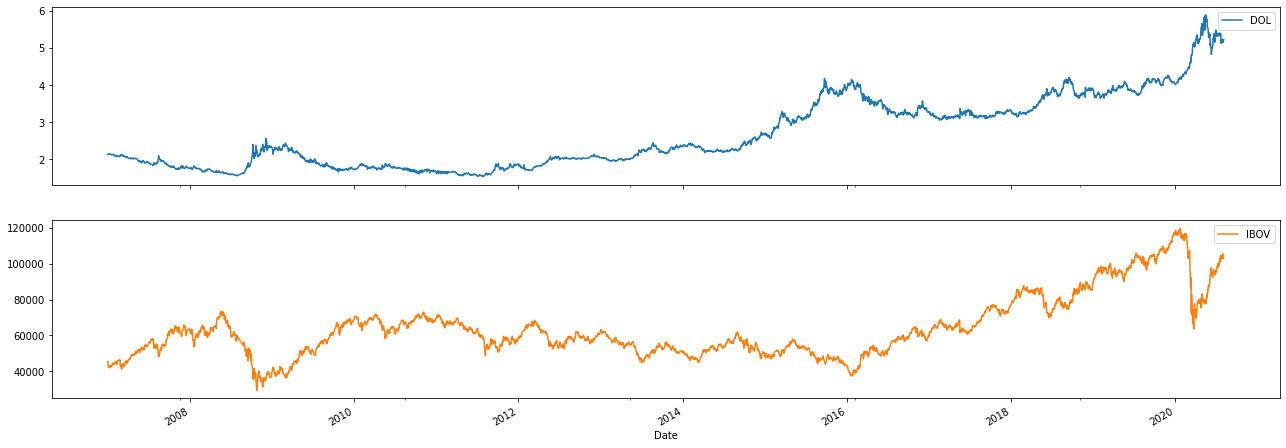

In [15]:
carteira.plot(subplots=True, figsize=(22,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a20f14f28>,
      dtype=object)

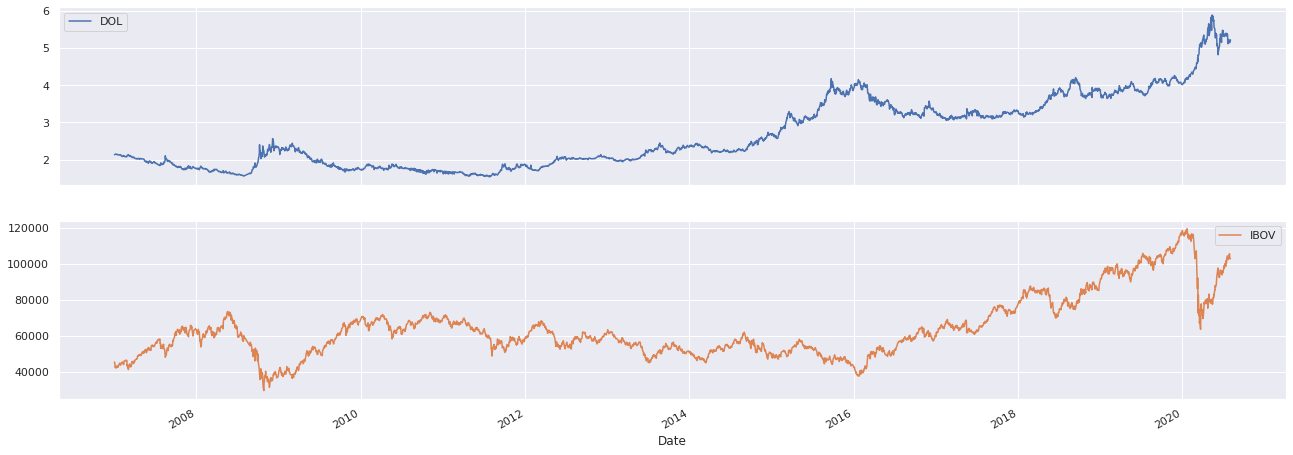

In [17]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8))

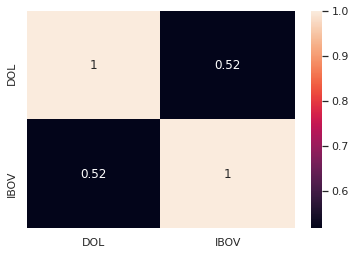

In [19]:
sns.heatmap(carteira.corr(), annot=True)

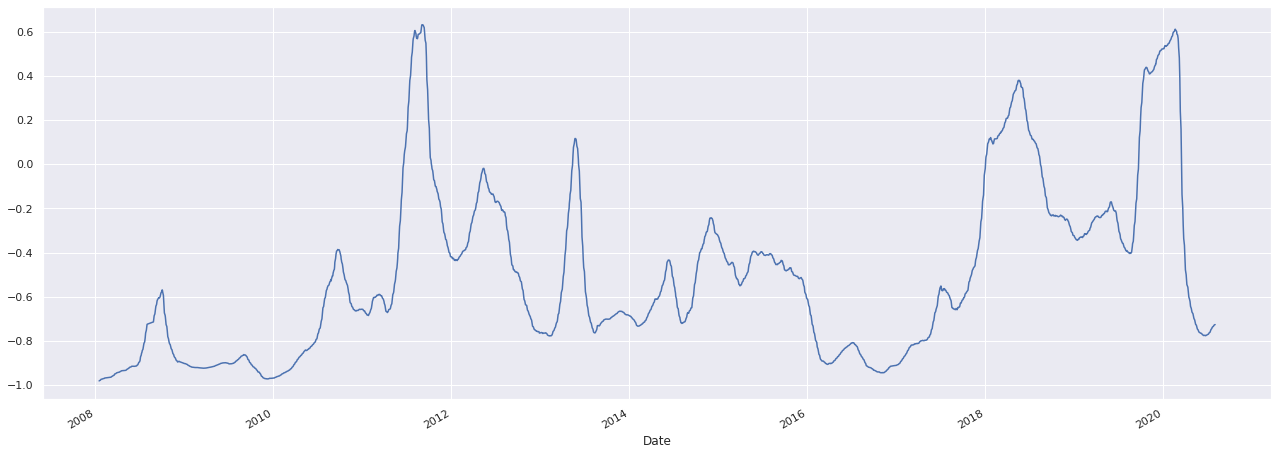

In [20]:
carteira["DOL"].rolling(252).corr(carteira["IBOV"]).plot(figsize=(22,8))

In [21]:
carteira["IBOV DOLARIZADO"] = (carteira["IBOV"]/carteira["DOL"])
carteira

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DOL,IBOV,IBOV DOLARIZADO
Date,,,
2007-01-02,2.13100,45383.0,21296.573959
2007-01-03,2.13450,44445.0,20822.206345
2007-01-04,2.13900,44020.0,20579.710732
2007-01-05,2.14700,42245.0,19676.291819
2007-01-08,2.14650,42830.0,19953.411504
...,...,...,...
2020-07-28,5.14142,104109.0,20249.075601
2020-07-29,5.15230,105605.0,20496.671863
2020-07-30,5.16880,105009.0,20315.934549


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a1d2719e8>,
      dtype=object)

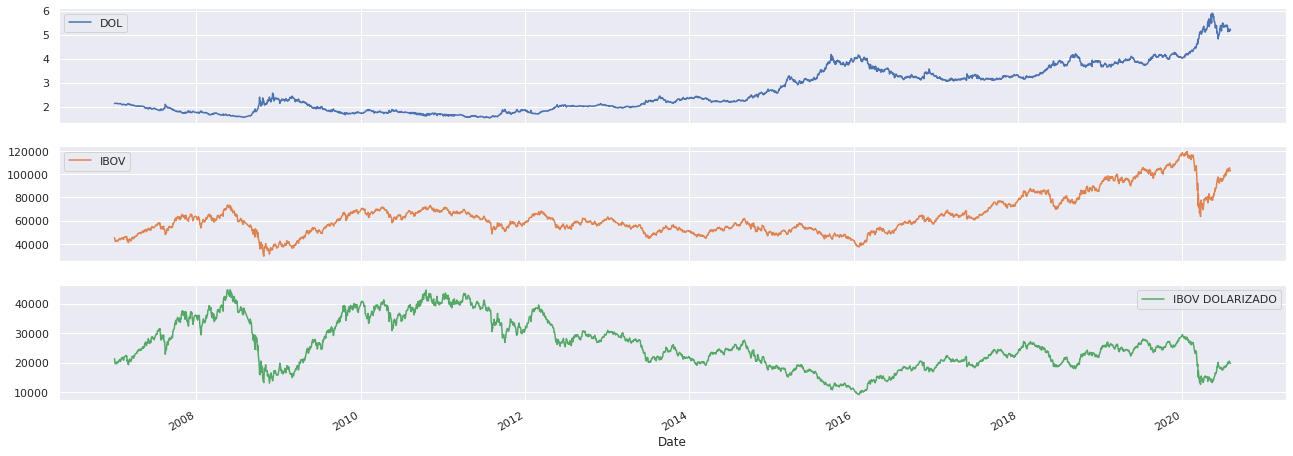

In [22]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8))